# 逻辑回归

## 1.建立数据集

### 1.1 生成数据集

In [1]:
from collections import OrderedDict
import pandas as pd

In [2]:
#数据集
examDict={
    '学习时间':[0.50,0.75,1.00,1.25,1.50,1.75,1.75,2.00,2.25,2.50,
            2.75,3.00,3.25,3.50,4.00,4.25,4.50,4.75,5.00,5.50],
    '通过考试':[0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,1,1,1,1,1]
}
examOrderDict=OrderedDict(examDict)
examDf=pd.DataFrame(examOrderDict)

In [3]:
examDf.head()

,学习时间,通过考试
0,0.50,0
1,0.75,0
2,1.00,0
3,1.25,0
4,1.50,0


### 1.2 提取特征与标签

In [4]:
#特征features
exam_X=examDf.loc[:,'学习时间']
#标签labes
exam_Y=examDf.loc[:,'通过考试']

### 1.3 绘制散点图

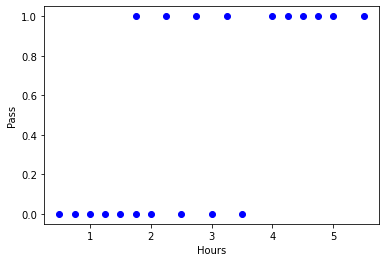

In [5]:
import matplotlib.pyplot as plt

#散点图
plt.scatter(exam_X, exam_Y, color="b", label="exam data")

# 添加图标标签
plt.xlabel("Hours")
plt.ylabel("Pass")

plt.show()

## 2.建立训练数据集和测试数据集
train_test_split是交叉验证中常用的函数，功能是从样本中随机的按比例选取训练数据（train）和测试数据（test）  
第1个参数：所要划分的样本特征  
第2个参数：所要划分的样本标签  
train_size：训练数据占比，如果是整数的话就是样本的数量

### 2.1 划分数据集

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(exam_X, exam_Y, train_size= .8)

#输出数据大小
print('原始数据特征：',exam_X.shape ,
      '，训练数据特征：', X_train.shape , 
      '，测试数据特征：',X_test.shape )

print('原始数据标签：',exam_Y.shape ,
      '训练数据标签：', Y_train.shape ,
      '测试数据标签：' ,Y_test.shape)

原始数据特征： (20,) ，训练数据特征： (16,) ，测试数据特征： (4,)
原始数据标签： (20,) 训练数据标签： (16,) 测试数据标签： (4,)


### 2.2 绘制散点图

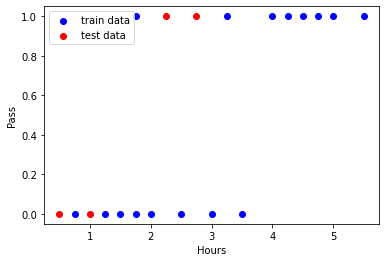

In [9]:
import matplotlib.pyplot as plt

plt.scatter(X_train, Y_train, color="blue", label="train data")
plt.scatter(X_test, Y_test, color="red", label="test data")

plt.legend(loc=2)
plt.xlabel("Hours")
plt.ylabel("Pass")
plt.show()

## 3.训练模型（使用训练数据）

In [14]:
'''
sklearn要求输入的特征必须是二维数组的类型，但是因为我们目前只有1个特征，所以需要用安装错误提示用reshape转行成二维数组的类型。
'''
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

# 导入逻辑回归包
from sklearn.linear_model import LogisticRegression
# 创建模型：逻辑回归
model = LogisticRegression()
# 训练模型
model.fit(X_train, Y_train)

LogisticRegression()

## 4.模型评估

### 4.1 评估模型：准确率

In [15]:

model.score(X_test, Y_test)

0.5

### 4.2 获得概率值
第1个值是标签为0的概率值，第2个值是标签为1的概率值

In [18]:
model.predict_proba([[3]])

array([[0.51960214, 0.48039786]])

### 4.3 预测数据：
使用模型的predict方法可以进行预测。  
这里我们输入学生的特征学习时间3小时，模型返回结果标签是1，表示预测该学生通过考试。

In [19]:
pred=model.predict([[3]])
print(pred)

[0]


## * 理解逻辑回归函数

### *.1 得到回归方程的z值
回归方程: $z=a+b$

In [21]:
#截距
a=model.intercept_
#回归系数
b=model.coef_

x=3
z=a+b*x

### *.2: 将z值带入逻辑回归函数中，得到概率值。
逻辑回归函数：
$$
\frac{1}{1+e^{-z}}
$$

In [23]:
import numpy as np
y_pred=1/(1+np.exp(-z))
print('预测的概率值：',y_pred)

预测的概率值： [[0.48039786]]
